In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pendulum-v0')
env._max_episode_steps = 600

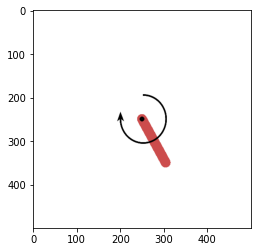

In [12]:
env.reset()

def muestra_entorno(env):
    im = plt.imshow(env.render('rgb_array'))
    plt.show()

muestra_entorno(env)

In [13]:
env.close()

In [1]:
# for i in range(50):
#     env.step(env.action_space.sample())
#     muestra_entorno(env)

In [440]:
# Discretizamos la acción de rango entre -2 y 2 en 40 valores

def discretize_action(action):
    return int(action/0.1)

discretize_action(env.action_space.sample())

-4

In [439]:
sample = env.action_space.sample()
observation, reward, done, info = env.step(sample)
print(f"Acción tomada: {sample} \n Estado: {observation} \n Reward: {reward} \n Hecho?: {done}")

Acción tomada: [0.03890076] 
 Estado: [-0.40545802 -0.91411366  0.77421794] 
 Reward: -4.316523794327479 
 Hecho?: False


In [256]:
# Sarsa
def get_epsilon_greedy_action(state, q_values, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        print(state)
        return np.argmax(q_values[state])

def sarsa(num_episodes = 500, ALPHA = 0.1, EPSILON = 0.25):
    q_values = np.zeros((env.observation_space.shape[0], env.action_space.shape[0]))
    rewards = []
    for i in range(num_episodes):
        state = env.reset() # Al resetear devuelve un estado aleatorio
        action = get_epsilon_greedy_action(state, q_values, EPSILON)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = get_epsilon_greedy_action(next_state, q_values, EPSILON)
            q_values[state, action] += ALPHA * (reward + q_values[next_state, next_action] - q_values[state, action])
            state = next_state
            action = next_action
        rewards.append(reward)
    return rewards

sarsa()

[-0.45704053 -0.88944587  0.54500468]


IndexError: arrays used as indices must be of integer (or boolean) type

In [17]:
env.observation_space

Box(-8.0, 8.0, (3,), float32)